## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('/kaggle/input/multijet-primary-dataset/MultiJetRun2010B.csv')
df.head()

print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nMissing:\n{df.isnull().sum()}")
df.describe()

Shape: (21726, 17)

Columns: ['Run', 'Lumi', 'Event', 'MR', 'Rsq', 'E1', 'Px1', 'Py1', 'Pz1', 'E2', 'Px2', 'Py2', 'Pz2', 'HT', 'MET', 'nJets', 'nBJets']

Missing:
Run       0
Lumi      0
Event     0
MR        0
Rsq       0
E1        0
Px1       0
Py1       0
Pz1       0
E2        0
Px2       0
Py2       0
Pz2       0
HT        0
MET       0
nJets     0
nBJets    0
dtype: int64


,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
count,21726.000000,21726.000000,2.172600e+04,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000
mean,148666.049710,900.693501,8.635646e+08,351.981435,0.023253,297.178955,0.283289,0.764211,-8.523257,277.410117,-0.399385,-0.909938,-1.915512,242.328342,16.005371,2.435791,0.053668
std,596.085618,496.482684,4.786516e+08,193.691363,0.023291,224.040020,91.701247,90.770124,341.366770,206.890743,76.720135,75.758491,321.415092,78.841528,10.797882,0.655750,0.236334
min,147926.000000,388.000000,3.023155e+08,29.999900,0.000009,44.947600,-543.821000,-648.385000,-2022.310000,42.048600,-700.112000,-459.801000,-1647.600000,120.938000,0.100445,2.000000,0.000000
25%,148029.000000,463.000000,4.976106e+08,229.790750,0.007907,143.531000,-78.472975,-75.770000,-151.347750,126.916250,-63.333250,-62.706450,-154.231750,193.252000,8.626845,2.000000,0.000000
50%,149181.000000,986.000000,9.709389e+08,292.911000,0.016817,212.060500,-0.310509,1.238670,-5.478110,204.140000,-0.548208,-1.900460,-1.803295,223.696000,14.035000,2.000000,0.000000
75%,149181.000000,999.000000,9.844834e+08,406.883000,0.031612,374.542750,78.562475,77.738075,135.345250,366.710500,62.852025,61.111550,151.167750,269.241500,21.091050,3.000000,0.000000
max,149181.000000,1804.000000,1.703645e+09,2433.820000,0.763695,2101.580000,722.291000,470.234000,2061.890000,1843.360000,405.326000,635.734000,1830.370000,1462.630000,423.144000,7.000000,2.000000


## Exploratory Data Analysis

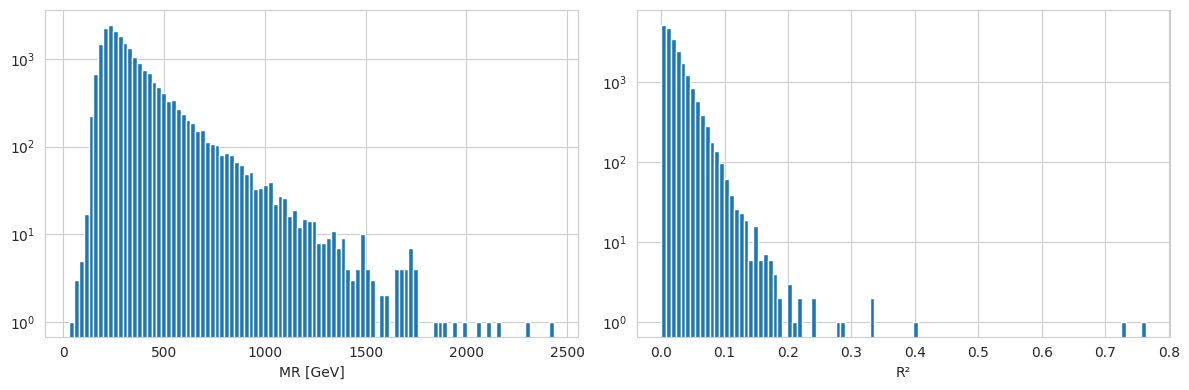

In [3]:
# Key variables: MR and Rsq (the razor variables)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(df['MR'], bins=100, log=True)
ax[0].set_xlabel('MR [GeV]')
ax[1].hist(df['Rsq'], bins=100, log=True)
ax[1].set_xlabel('R²')
plt.tight_layout()
plt.show()

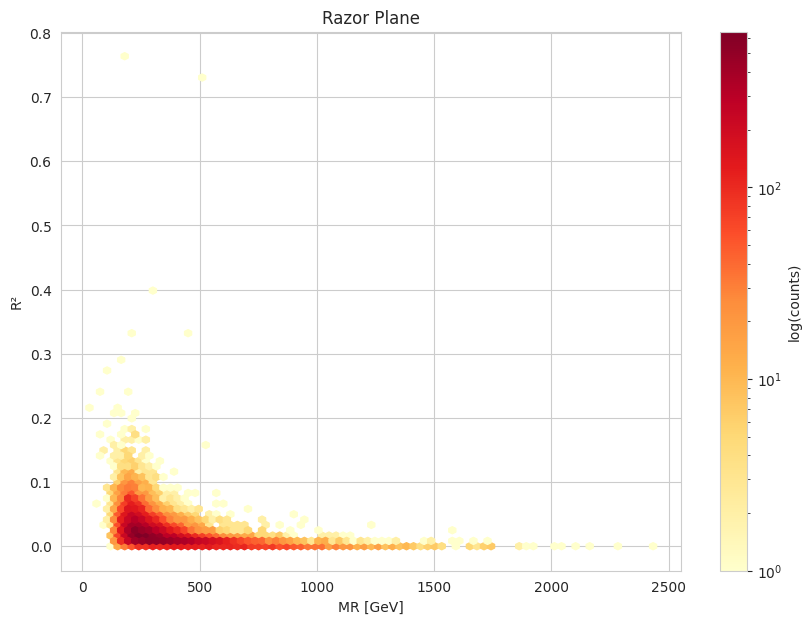

In [4]:
# The famous razor plane
plt.figure(figsize=(10, 7))
plt.hexbin(df['MR'], df['Rsq'], gridsize=80, cmap='YlOrRd', bins='log', mincnt=1)
plt.xlabel('MR [GeV]')
plt.ylabel('R²')
plt.colorbar(label='log(counts)')
plt.title('Razor Plane')
plt.show()

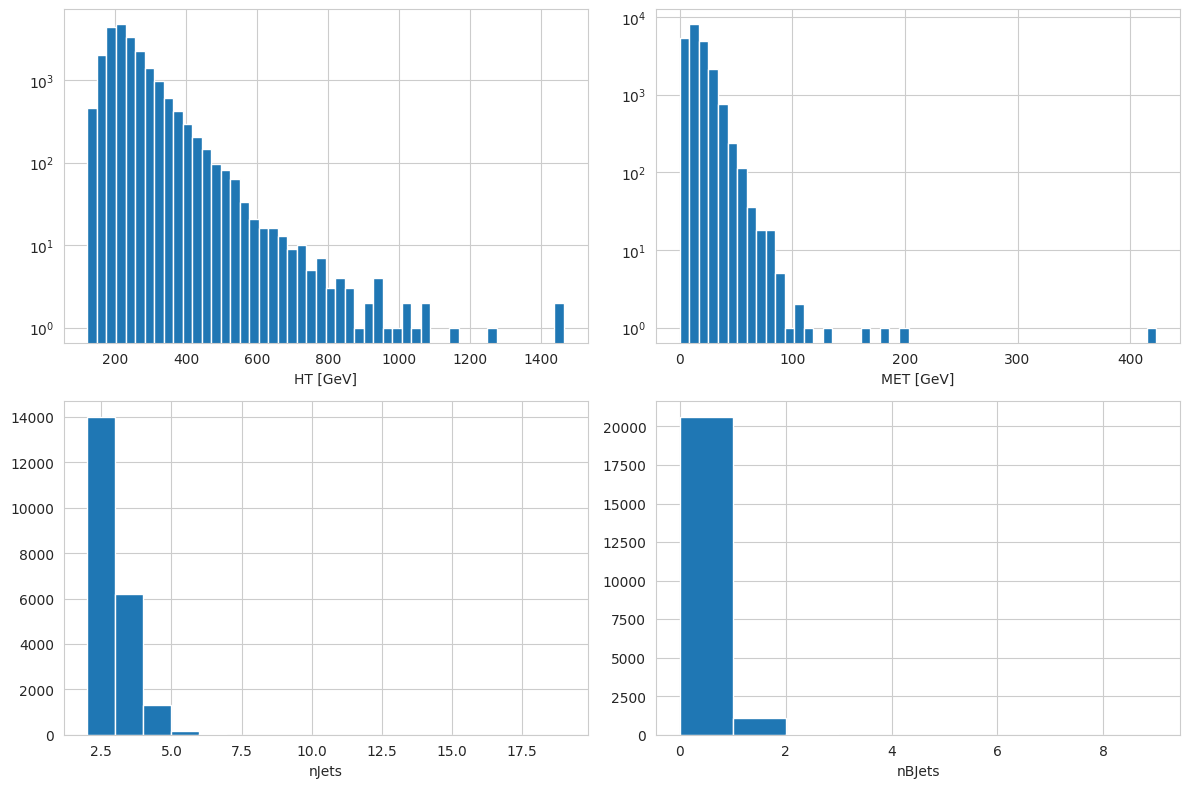

In [5]:
# What else?
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0,0].hist(df['HT'], bins=50, log=True)
ax[0,0].set_xlabel('HT [GeV]')
ax[0,1].hist(df['MET'], bins=50, log=True)
ax[0,1].set_xlabel('MET [GeV]')
ax[1,0].hist(df['nJets'], bins=range(2, 20))
ax[1,0].set_xlabel('nJets')
ax[1,1].hist(df['nBJets'], bins=range(0, 10))
ax[1,1].set_xlabel('nBJets')
plt.tight_layout()
plt.show()

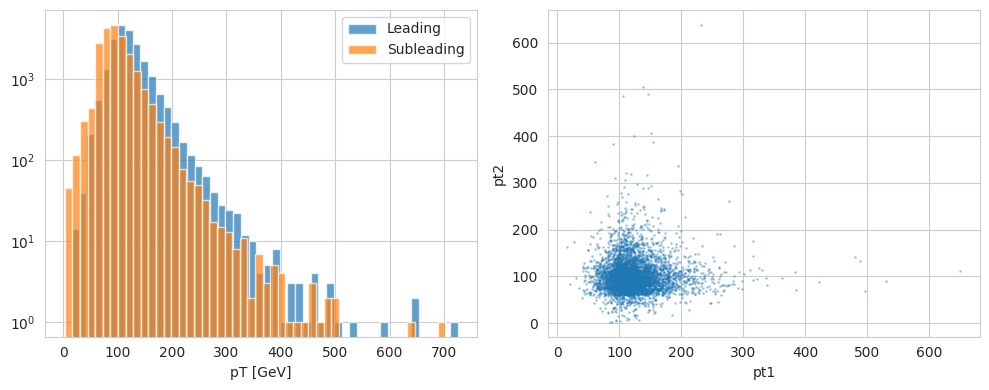

In [6]:
# Compute transverse momentum from 4-vectors
df['pt1'] = np.sqrt(df['Px1']**2 + df['Py1']**2)
df['pt2'] = np.sqrt(df['Px2']**2 + df['Py2']**2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['pt1'], bins=50, alpha=0.7, label='Leading')
plt.hist(df['pt2'], bins=50, alpha=0.7, label='Subleading')
plt.xlabel('pT [GeV]')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df['pt1'].sample(5000), df['pt2'].sample(5000), alpha=0.3, s=1)
plt.xlabel('pt1')
plt.ylabel('pt2')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


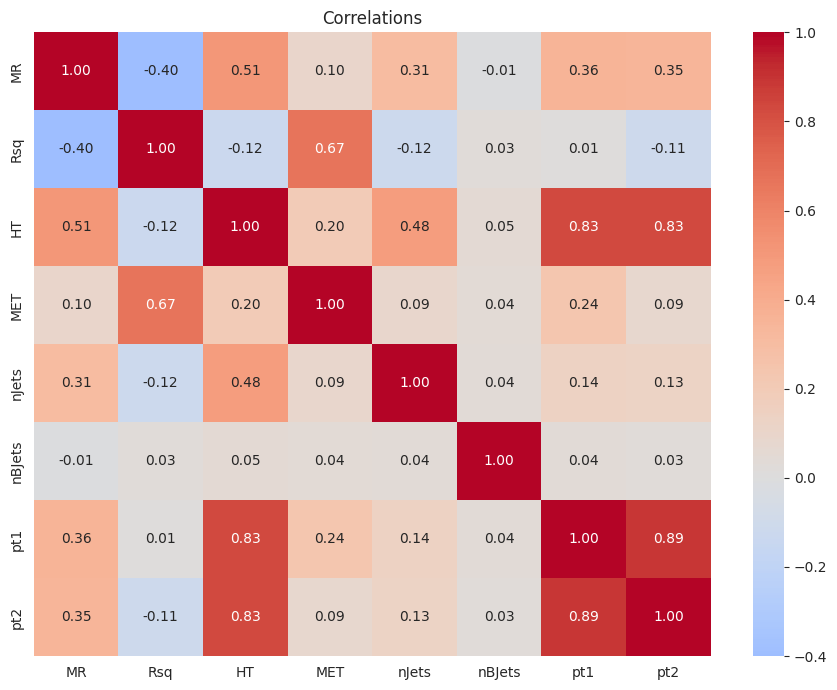

In [7]:
# Correlations (just the interesting stuff)
cols = ['MR', 'Rsq', 'HT', 'MET', 'nJets', 'nBJets', 'pt1', 'pt2']
plt.figure(figsize=(9, 7))
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlations')
plt.tight_layout()
plt.show()

In [8]:
# Anything weird?
print("Any negative energies?")
print(f"E1 < 0: {(df['E1'] < 0).sum()}")
print(f"E2 < 0: {(df['E2'] < 0).sum()}")
print(f"\nRsq range: [{df['Rsq'].min():.4f}, {df['Rsq'].max():.4f}]")
print(f"Should be [0, 1]? {df['Rsq'].between(0, 1).all()}")

Any negative energies?
E1 < 0: 0
E2 < 0: 0

Rsq range: [0.0000, 0.7637]
Should be [0, 1]? True


## Unsupervised Anomaly Detection

Use IsolationForest to find events that don't fit the typical pattern—no labels needed.

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Compute derived features needed for anomaly detection
df['MET_over_HT'] = df['MET'] / (df['HT'] + 1e-10)
df['pt_ratio'] = df['pt2'] / (df['pt1'] + 1e-10)

# Select features for anomaly detection
anomaly_features = ['MR', 'Rsq', 'HT', 'MET', 'pt1', 'pt2', 'MET_over_HT', 'pt_ratio']

# Standardize features (important for anomaly detection)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[anomaly_features])

# Train IsolationForest
# contamination = expected fraction of anomalies (we'll use 5%)
iso_forest = IsolationForest(
    contamination=0.05,
    random_state=42,
    n_estimators=100
)

print("Training IsolationForest...")
df['anomaly_score'] = iso_forest.fit_predict(X_scaled)
df['anomaly_score_raw'] = iso_forest.score_samples(X_scaled)  # Lower = more anomalous

# Convert to binary: -1 (anomaly) -> 1, 1 (normal) -> 0
df['is_anomaly'] = (df['anomaly_score'] == -1).astype(int)

print(f"\nAnomalies detected: {df['is_anomaly'].sum()} ({df['is_anomaly'].mean()*100:.2f}%)")
print(f"Anomaly score range: [{df['anomaly_score_raw'].min():.3f}, {df['anomaly_score_raw'].max():.3f}]")

Training IsolationForest...

Anomalies detected: 1087 (5.00%)
Anomaly score range: [-0.758, -0.362]


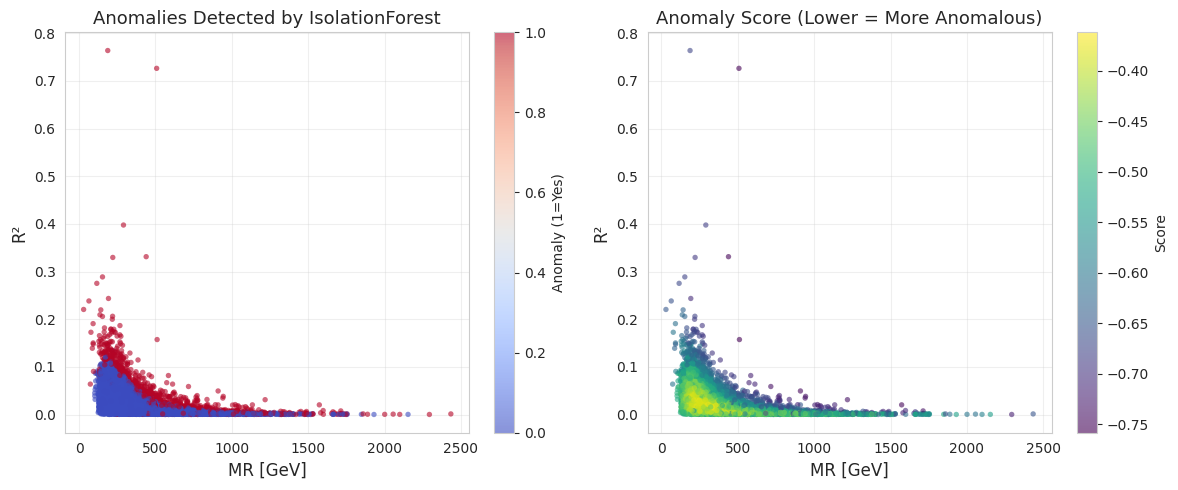

In [10]:
# Visualize anomalies on the razor plane
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df['MR'], df['Rsq'], c=df['is_anomaly'], 
                     cmap='coolwarm', alpha=0.6, s=15, edgecolors='none')
plt.xlabel('MR [GeV]', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.title('Anomalies Detected by IsolationForest', fontsize=13)
plt.colorbar(scatter, label='Anomaly (1=Yes)')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(df['MR'], df['Rsq'], c=df['anomaly_score_raw'], 
           cmap='viridis', alpha=0.6, s=15, edgecolors='none')
plt.xlabel('MR [GeV]', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.title('Anomaly Score (Lower = More Anomalous)', fontsize=13)
plt.colorbar(label='Score')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Inspect the top anomalies
top_anomalies = df.nsmallest(20, 'anomaly_score_raw')

print("Top 20 Most Anomalous Events:")
print("="*80)
display_cols = ['Run', 'Event', 'MR', 'Rsq', 'HT', 'MET', 'nJets', 'nBJets', 
                'pt1', 'pt2', 'anomaly_score_raw']
print(top_anomalies[display_cols].to_string(index=False))

# Summary statistics for anomalies vs normal
print("\n" + "="*80)
print("Anomalies vs Normal Events:")
print("="*80)
for col in ['MR', 'Rsq', 'HT', 'MET', 'pt1', 'pt2']:
    normal_mean = df[df['is_anomaly']==0][col].mean()
    anomaly_mean = df[df['is_anomaly']==1][col].mean()
    print(f"{col:10s}: Normal={normal_mean:8.2f}  |  Anomaly={anomaly_mean:8.2f}  |  Ratio={anomaly_mean/normal_mean:.2f}x")

Top 20 Most Anomalous Events:
   Run      Event       MR      Rsq       HT       MET  nJets  nBJets        pt1        pt2  anomaly_score_raw
149181  970943320  511.001 0.157295  493.270 130.99400      2       2 315.332140 177.938041          -0.758264
149181  970118251  507.908 0.726316  449.312 423.14400      2       0 310.834103 138.477748          -0.757315
149181  975638964  439.334 0.331186  439.139 201.93200      2       0 316.392319 122.746859          -0.754711
147926  497831110 1572.870 0.020306 1252.700  77.74360      5       0 642.870596 505.318768          -0.750698
149181 1702136174  910.267 0.049413  939.420  83.31330      3       0 496.997022 386.022407          -0.750506
149181  985642137  716.412 0.058790  715.090  77.58770      3       0 388.955179 318.426082          -0.740135
148029  304677861 1218.030 0.031157 1078.120  78.80630      3       0 586.040567 490.963947          -0.738901
149181  984095893  943.942 0.038106  947.796  69.50060      5       0 481.090623 4

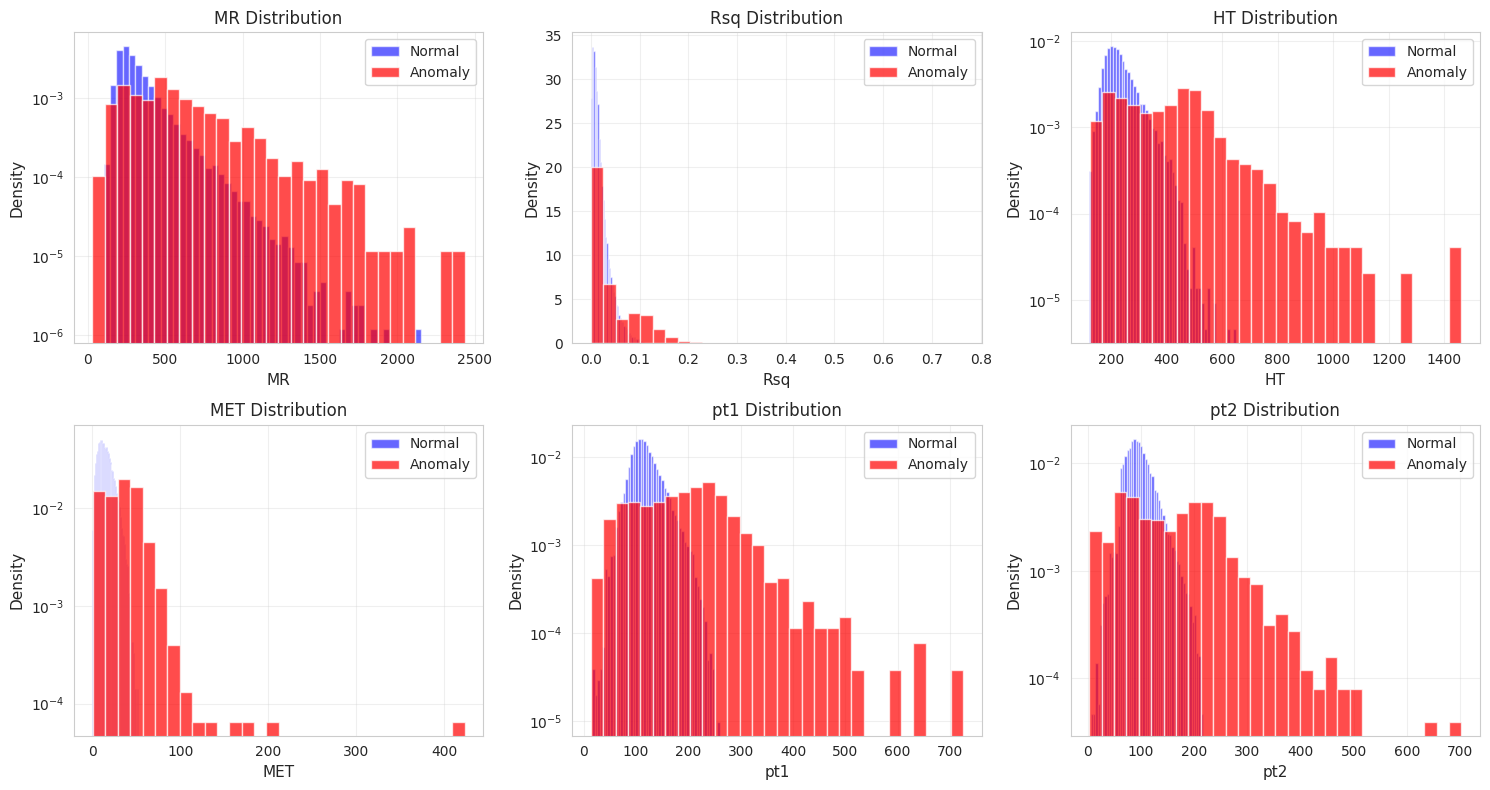

In [12]:
# Distribution comparison: anomalies vs normal
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

features_to_plot = ['MR', 'Rsq', 'HT', 'MET', 'pt1', 'pt2']

for idx, feat in enumerate(features_to_plot):
    ax = axes[idx]
    
    # Plot distributions
    ax.hist(df[df['is_anomaly']==0][feat], bins=50, alpha=0.6, 
            label='Normal', density=True, color='blue')
    ax.hist(df[df['is_anomaly']==1][feat], bins=30, alpha=0.7, 
            label='Anomaly', density=True, color='red')
    
    ax.set_xlabel(feat, fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'{feat} Distribution', fontsize=12)
    ax.legend()
    ax.grid(alpha=0.3)
    if feat in ['MR', 'HT', 'MET', 'pt1', 'pt2']:
        ax.set_yscale('log')

plt.tight_layout()
plt.show()

## Analysis of Anomaly Detection Results

The anomaly detection model successfully identified events with characteristics that are highly relevant for new physics searches. Here's a breakdown of the key findings.

### 1. Top 20 Most Anomalous Events

This list represents the model's "most wanted" candidates for new physics. A close inspection reveals why they were flagged:

- **Extreme Kinematics:** Many events have exceptionally high values for `MR` (mass scale), `HT` (total energy), and `MET` (missing energy). For instance, events with `MR > 1500` or `MET > 400` are clear outliers compared to the bulk of the data.
- **High Imbalance:** The second event, with an `Rsq` of **0.726**, is a prime example of an extremely imbalanced event, making it highly anomalous.
- **Unusual Combinations:** The model is not just picking events with high values across the board. It also flags events with strange combinations, such as an extremely high `MR` but very low `MET` and `Rsq`, which deviates from the expected correlations.
- **Rare Particles:** The presence of b-jets (`nBJets > 0`) is a rare feature in this dataset. The model correctly identifies that events containing b-jets are more likely to be anomalous.

### 2. Statistical Comparison: Anomalies vs. Normal Events

The summary statistics provide a clear, quantitative picture of what makes an event "anomalous":

- **Missing Energy is Key:** The most significant differentiator is `MET`, which is, on average, **2.3 times higher** for anomalous events. This confirms the model has learned that large missing energy is a powerful indicator of rarity.
- **Higher Mass and Energy:** Anomalous events are, on average, much more energetic. Their `MR` is **1.74x** higher and their `HT` is **1.71x** higher than normal events.
- **Greater Imbalance:** The average `Rsq` for anomalies is **more than double** that of normal events, confirming that event imbalance is a critical feature.

### Overall Conclusion

Without any prior knowledge of physics, the `IsolationForest` model independently learned to identify the key features that physicists use when searching for new phenomena like Supersymmetry (SUSY). It has successfully created a ranked list of candidate events characterized by:
1.  **High Mass** (`MR`)
2.  **High Energy** (`HT`, `pT`)
3.  **Large Missing Energy** (`MET`) and **Imbalance** (`Rsq`)

This demonstrates the power of unsupervised machine learning as a tool for model-agnostic discovery in high-energy physics. The top-ranked anomalies are the most promising events in this dataset for further, more detailed investigation.